# What's in the notebook?

## 1. Data Cleaning & Data Preparation
   - ##### Loading data as a Pandas Data Frame
   - ##### Selecting relevant columns/features
   - ##### Removing unphysical records/rows
   - ##### Undersampling
   - ##### Creating training, validation and test splits
   - ##### Converting data into numpy arrays
   - ##### Normalizing The Data

## 2. Data Visualisation
 - #### Principal Component Analysis
   - ##### Intercative 3d scatter plot

## 3. Data Classification
 - ### Unsupervised Learning
   - ##### Gaussian Mixture Model - Clustering

 - ### Supervised Learning
   - ##### Neural Network
   - ##### XGBoost
   - ##### Random Forest 

## 4. Model Ensembling
   - ##### Simple-Random-Search for weight optimization

## 5. Conclusions & Future Work?

## 6. Some other suggestions?
   - ##### How can we achieve this?
   - ##### Possible Limitations

In [2]:
# # for test purposes
# import sklearn
# import tensorflow


In [3]:
# Import necessary libraries
import numpy as np  # Importing the NumPy library for numerical operations
import pandas as pd  # Importing the Pandas library for data manipulation
import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization

# Import TensorFlow for neural networks
from tensorflow.keras.layers import Input, Dense  # Importing specific layers and functions
from tensorflow.keras import optimizers, callbacks  # Importing optimizers and callbacks
from tensorflow.keras.models import Model  # Importing the Model class

# Import scikit-learn for evaluation metrics and machine learning models
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay  # Importing metrics
from xgboost import XGBClassifier  # Importing XGBoost classifier
from sklearn.ensemble import RandomForestClassifier  # Importing Random Forest classifier
from sklearn.decomposition import PCA  # Importing Principal Component Analysis

# Import custom helping_functions for additional functions
import helping_functions as hp

# Import itertools for generating permutations
from itertools import permutations

# Import Plotly Express for interactive visualizations
import plotly.express as px

# Import Gaussian Mixture Model for unsupervised learning
from sklearn.mixture import GaussianMixture

# For saving the trained models
import pickle


2025-03-22 10:35:03.133207: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-22 10:35:03.136167: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-22 10:35:03.173670: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-22 10:35:04.529245: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Stellar Classification Dataset - SDSS17
### Classification of Stars, Galaxies and Quasars. Sloan Digital Sky Survey DR17

#### **Context**


**This dataset aims to classify stars, galaxies, and quasars based on their spectral characteristics.**

The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

| Feature Name   | Description                                                                                                       |
|---------------|-------------------------------------------------------------------------------------------------------------------|
| obj_ID        | Object Identifier, the unique value that identifies the object in the image catalog used by the CAS             |
| alpha         | Right Ascension angle (at J2000 epoch)                                                                          |
| delta         | Declination angle (at J2000 epoch)                                                                             |
| u             | Ultraviolet filter in the photometric system                                                                   |
| g             | Green filter in the photometric system                                                                        |
| r             | Red filter in the photometric system                                                                          |
| i             | Near Infrared filter in the photometric system                                                                |
| z             | Infrared filter in the photometric system                                                                     |
| run_ID        | Run Number used to identify the specific scan                                                                 |
| rereun_ID     | Rerun Number to specify how the image was processed                                                            |
| cam_col       | Camera column to identify the scanline within the run                                                         |
| field_ID      | Field number to identify each field                                                                           |
| spec_obj_ID   | Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class) |
| class         | Object class (galaxy, star, or quasar object)                                                                 |
| redshift      | Redshift value based on the increase in wavelength                                                            |
| plate         | Plate ID, identifies each plate in SDSS                                                                        |
| MJD           | Modified Julian Date, used to indicate when a given piece of SDSS data was taken                               |
| fiber_ID      | Fiber ID that identifies the fiber that pointed the light at the focal plane in each observation              |

#### **Citation**

[fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17.](https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17)

#### **Acknowledgements**

The data released by the SDSS is under public domain. Its taken from the current data release RD17
[More information about the license](http://www.sdss.org/science/image-gallery/)

#### **SDSS Publications**

The Seventeenth data release of the Sloan Digital Sky Surveys: Complete Release of MaNGA, MaStar and APOGEE-2 DATA (Abdurro’uf et al. submitted to ApJS) [arXiv:2112.02026](https://arxiv.org/abs/2112.02026)


### [Click Here for more details & to download the dataset](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17)


#### Loading & Exploring The Data


In [4]:
data_frame = pd.read_csv('dataset/star_classification.csv')


In [5]:
data_frame.head()


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


#### Removing unwanted Columns


In [6]:
columns_list = data_frame.columns
columns_list


Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [7]:
columns_to_be_dropped = ['obj_ID', 'alpha', 'delta', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID']
data_frame.drop(columns = columns_to_be_dropped, inplace = True)


In [8]:
data_frame.head()


,u,g,r,i,z,class,redshift
0,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123


#### Looking for NULL values

In [9]:
# checking if there are any 'NULL' records/rows in the dataframe
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   u         100000 non-null  float64
 1   g         100000 non-null  float64
 2   r         100000 non-null  float64
 3   i         100000 non-null  float64
 4   z         100000 non-null  float64
 5   class     100000 non-null  object 
 6   redshift  100000 non-null  float64
dtypes: float64(6), object(1)
memory usage: 5.3+ MB


#### Looking for unphysical values


In [10]:
# looking for unreal/bad/unphysical values

# if we don't remove them, we'll face problems in data visualization
data_frame.describe()


,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,21.980468,20.531387,19.645762,19.084854,18.668810,0.576661
std,31.769291,31.750292,1.854760,1.757895,31.728152,0.730707
min,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971
25%,20.352353,18.965230,18.135828,17.732285,17.460677,0.054517
50%,22.179135,21.099835,20.125290,19.405145,19.004595,0.424173
75%,23.687440,22.123767,21.044785,20.396495,19.921120,0.704154
max,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


In [11]:
# we see that the value of -9999 is clearly an unreal value

# the index corresponding to this unreal value
min_index = data_frame['u'].idxmin()
min_index


79543

In [12]:
# Removing the row which contains the unreal
data_frame.drop(min_index, inplace= True)


In [13]:
# checking if there are anymore unreal values
data_frame.describe()


,u,g,r,i,z,redshift
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,22.080679,20.631583,19.645777,19.084865,18.768988,0.576667
std,2.251068,2.037384,1.854763,1.757900,1.765982,0.730709
min,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971
25%,20.352410,18.965240,18.135795,17.732280,17.460830,0.054522
50%,22.179140,21.099930,20.125310,19.405150,19.004600,0.424176
75%,23.687480,22.123775,21.044790,20.396510,19.921120,0.704172
max,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


#### Grouping the rows/records based on their class

In [14]:
# printing the number of samples for each class
data_frame['class'].value_counts()


class
GALAXY    59445
STAR      21593
QSO       18961
Name: count, dtype: int64

In [15]:
# grouping the records/rows based on their class
grouped = data_frame.groupby('class')


In [16]:
# Extracting the records corresponding to each class into separate sub-dataframes
# df: 'd'ata 'f'rame

df_corresponding_to_quasars   =  grouped.get_group('QSO')
df_corresponding_to_galaxies  =  grouped.get_group('GALAXY')
df_corresponding_to_stars     =  grouped.get_group('STAR')


**Downsampling the sub dataframes corresponding to the classes 'GALAXY' and 'STAR', so that they have the same number of samples as the sub dataframe corresponding to the class 'QSO'. Removing class imbalance leads to a better trained the neural network.**

Note that the downsampling is random i.e. The records to be included in the new dataset are selected randomly.


In [17]:
desired_sample_size = len(df_corresponding_to_quasars)

df_corresponding_to_galaxies  =  df_corresponding_to_galaxies.sample(n = desired_sample_size)
df_corresponding_to_stars     =  df_corresponding_to_stars.sample(   n = desired_sample_size)


In [18]:
print('Length of dataframe corresponding to the class QSO is:    ',len(df_corresponding_to_quasars))
print('Length of dataframe corresponding to the class Galaxy is: ',len(df_corresponding_to_galaxies))
print('Length of dataframe corresponding to the class QSO is:    ',len(df_corresponding_to_stars))


Length of dataframe corresponding to the class QSO is:     18961
Length of dataframe corresponding to the class Galaxy is:  18961
Length of dataframe corresponding to the class QSO is:     18961


#### Quasars Data

In [19]:
df_corresponding_to_quasars.describe()


,u,g,r,i,z,redshift
count,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000
mean,21.547619,20.926193,20.624089,20.431173,20.266732,1.719676
std,1.495879,1.163239,1.084237,1.080135,1.095076,0.913954
min,10.996230,13.662170,12.357630,12.637440,11.302470,0.000461
25%,20.637640,20.249730,20.006330,19.811070,19.644250,1.106605
50%,21.503240,21.056290,20.772720,20.582110,20.373970,1.617232
75%,22.286470,21.687770,21.413450,21.202280,21.001230,2.220279
max,32.781390,27.894820,27.397090,32.141470,28.790550,7.011245


#### Galaxies Data

In [20]:
df_corresponding_to_galaxies.describe()


,u,g,r,i,z,redshift
count,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000
mean,22.601638,20.918742,19.599179,18.860099,18.457504,0.423540
std,2.271308,2.104695,1.874411,1.689962,1.657394,0.265491
min,14.560100,12.688490,11.772290,11.319370,10.897380,-0.004713
25%,20.817800,18.942050,17.835370,17.394030,17.117180,0.166856
50%,22.855980,21.603760,20.124900,19.236320,18.781780,0.458385
75%,24.210750,22.449450,20.983610,19.948550,19.474460,0.595072
max,28.901740,29.862580,27.626880,30.163590,29.383740,1.994085


#### Stars Data


In [21]:
df_corresponding_to_stars.describe()


,u,g,r,i,z,redshift
count,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000
mean,21.142021,19.608046,18.942383,18.541611,18.333125,-0.000118
std,2.355928,2.117207,1.975575,1.844937,1.848552,0.000462
min,12.262400,10.511390,9.822070,9.469903,9.612333,-0.004136
25%,19.322850,18.033990,17.451260,17.136880,16.960120,-0.000296
50%,21.005600,19.538810,18.952050,18.595010,18.322410,-0.000077
75%,22.939960,21.223590,20.551210,20.043830,19.730940,0.000074
max,29.234380,28.903200,27.593320,26.893990,26.427790,0.004153


We see that the redshift feature takes on values that are quite different than the values of other features. So, we'll have to do feature scaling on a all of the features so that each feature will take on values in somewhat similar range. Feature scaling is necessary for efficient training.


### Neural netwroks don't take non-numeric data as input. All the data must be converted into numeric form before feeding it into a neural network.
|string name|numeric name|
|----------|----------|
|Quasar| 0 |
|Galaxy| 1 |
|Star| 2 |

In [ ]:
df_corresponding_to_quasars['class']   =  0 
df_corresponding_to_galaxies['class']  =  1
df_corresponding_to_stars['class']     =  2


In [23]:
df_corresponding_to_quasars.head(3)


,u,g,r,i,z,class,redshift
5,23.48827,23.33776,21.32195,20.25615,19.54544,0,1.424659
6,21.46973,21.17624,20.92829,20.60826,20.42573,0,0.586455
17,20.38562,20.40514,20.29996,20.05918,19.89044,0,2.031528


In [24]:
df_corresponding_to_galaxies.head(3)


,u,g,r,i,z,class,redshift
42725,22.36036,21.22875,19.94046,19.18433,18.69902,1,0.506194
68447,22.99170,22.12631,20.42907,19.37077,18.99809,1,0.574152
43388,21.95192,19.44278,18.01530,17.45456,17.11593,1,0.216643


In [25]:
df_corresponding_to_stars.head(3)


,u,g,r,i,z,class,redshift
99516,20.56231,18.87143,18.09829,17.77057,17.64882,2,0.000109
85914,22.15038,21.48865,21.35597,21.32019,21.45773,2,0.000071
93230,21.15509,19.75413,19.04845,18.80804,18.82572,2,-0.000094


### Creating training, validation and test dataframes


#### Splitting the sub-dataframes into training, validation and test dataframes


In [26]:
percentages = [60, 20, 20]

train_quasar_df, valid_quasar_df, test_quasar_df        =  hp.split_dataframe(df_corresponding_to_quasars,  percentages)
print()

train_galaxies_df, valid_galaxies_df, test_galaxies_df  =  hp.split_dataframe(df_corresponding_to_galaxies, percentages)
print()

train_stars_df, valid_stars_df, test_stars_df           =  hp.split_dataframe(df_corresponding_to_stars,    percentages)


Train DataFrame Shape: (11376, 7)
Validation DataFrame Shape: (3792, 7)
Test DataFrame Shape: (3793, 7)

Train DataFrame Shape: (11376, 7)
Validation DataFrame Shape: (3792, 7)
Test DataFrame Shape: (3793, 7)

Train DataFrame Shape: (11376, 7)
Validation DataFrame Shape: (3792, 7)
Test DataFrame Shape: (3793, 7)


In [27]:
# Confirming if any of the records is misplaced i.e. All of the rows/records corresponding to the quasars must have a value of 'zero' in the column of class.
# If the class of a record is not zero, then it means this record was misplaced i.e. this record belongs to some other class and it must be transferred to
# the dataframe corresponding to that other class.

print(np.sum(train_quasar_df['class'] != 0))   # if there is even one non-quasar recor/row present in this dataframe, the result of this line will be non-zero
print(np.sum(valid_quasar_df['class'] != 0))
print(np.sum(test_quasar_df['class']  != 0))

print(np.sum(train_galaxies_df['class'] != 1))
print(np.sum(valid_galaxies_df['class'] != 1))
print(np.sum(test_galaxies_df['class']  != 1))

print(np.sum(train_stars_df['class'] != 2))
print(np.sum(valid_stars_df['class'] != 2))
print(np.sum(test_stars_df['class']  != 2))


0
0
0
0
0
0
0
0
0


In [28]:
# creating final concatenated training, validation and test dataframes
train_df = pd.concat([train_quasar_df, train_galaxies_df, train_stars_df])
valid_df = pd.concat([valid_quasar_df, valid_galaxies_df, valid_stars_df])
test_df  = pd.concat([test_quasar_df,  test_galaxies_df,  test_stars_df])


In [29]:
# Looking out for class imbalance
# Confirming that all of the classes have equal representation in all of the dataframes i.e. there is no class imbalance
print(np.sum(train_df['class'] == 0))
print(np.sum(train_df['class'] == 1))
print(np.sum(train_df['class'] == 2))
print()

print(np.sum(valid_df['class'] == 0))
print(np.sum(valid_df['class'] == 1))
print(np.sum(valid_df['class'] == 2))
print()

print(np.sum(test_df['class'] == 0))
print(np.sum(test_df['class'] == 1))
print(np.sum(test_df['class'] == 2))
print()


11376
11376
11376

3792
3792
3792

3793
3793
3793



In [30]:
# shuffling the training data
train_df = train_df.sample(frac=1, random_state=42)  # Setting random_state for reproducibility


In [31]:
train_df.head()


,u,g,r,i,z,class,redshift
15300,19.84393,17.81657,16.84006,16.30906,15.90092,1,0.079815
84881,23.73784,22.94604,21.10194,20.39875,20.25956,1,0.395048
26766,22.87862,20.67815,19.83870,19.48771,19.30518,2,-0.000765
24308,20.52766,19.90160,19.71941,19.78516,19.29395,0,0.710744
99358,23.99846,22.25284,20.45845,19.49373,18.99804,1,0.508819


#### Extracting labels from all data splits


In [32]:
train_labels = np.array( train_df['class'] )
valid_labels = np.array( valid_df['class'] )
test_labels  = np.array( test_df['class']  )


#### Converting the training, validation and test data into a numpy array


In [33]:
# converting all of the columns of dataframes into numpy arrays except the column 'class'
train_np  = np.array( train_df[['u', 'g', 'r', 'i', 'z', 'redshift']] )
valid_np  = np.array( valid_df[['u', 'g', 'r', 'i', 'z', 'redshift']] )
test_np   = np.array(  test_df[['u', 'g', 'r', 'i', 'z', 'redshift']] )


#### Feature Scaling
very very important for efficient gradient descent i.e. efficient and smooth training

In [34]:
# Normalizing the data
mean = train_np.mean(axis=0) # notice we'll use the mean of training data to normalize the validation and test datasets as well
#np.savetxt('mean.csv', mean, delimiter=',')

train_np = train_np - mean
valid_np = valid_np - mean
test_np  =  test_np - mean

std = train_np.std(axis=0) # notice we'll use the standard_deviation of the mean-subtracted training data to normalize the validation and test datasets as well
#np.savetxt('standard_deviation.csv', std, delimiter=',')

train_np = train_np/std
valid_np = valid_np/std
test_np  = test_np/std


In [36]:
# valid_np_production = np.array( valid_df[['u', 'g', 'r', 'i', 'z', 'redshift']] )


# print(valid_np_production.shape)
# print(valid_np_production.shape)

# random_validation_data_pr = np.zeros((11376, 7))
# print(random_validation_data_pr.shape)
# random_validation_data_pr[:,:-1] = valid_np_production
# random_validation_data_pr[:,-1]  = valid_labels 

# file_path = 'random_validation_data_pr.csv'

# # Saving the NumPy array as a CSV file
# np.savetxt(file_path, random_validation_data_pr, delimiter=',')



(11376, 6)
(11376, 6)
(11376, 7)


In [37]:
# print(test_np.shape)
# print(test_labels.shape)

# random_testing_data = np.zeros((11379, 7))
# print(random_testing_data.shape)
# random_testing_data[:,:-1] = test_np
# random_testing_data[:,-1]  = test_labels 

# file_path = 'random_testing_data.csv'

# # Saving the NumPy array as a CSV file
# np.savetxt(file_path, random_testing_data, delimiter=',')


(11379, 6)
(11379,)
(11379, 7)


# Principal Component Analysis - Visualizing the data - Setting up an initial Baseline Performance
We'll project our 6-dimensional data onto three dimensions and then we'll see if there are any anomalous samples left in the data.

Furthermore, if there are any clear groups in the data then we can simply use clustering for classification i.e. an unsupervised learning approach


In [38]:
#from sklearn.decomposition import PCA

# Loading the PCA algorithm
pca_3 = PCA(n_components=3)
pca_3


PCA(n_components=3)

In [39]:
# fitting the data. sklearn's implementation automatically normalizes the data. Here the data was already normalized by us
pca_3.fit(train_np)


PCA(n_components=3)

In [40]:
pca_3.explained_variance_ratio_
# so, 74% of the variance is explained by the first-new-axis


array([0.7419601 , 0.16256214, 0.07411797])

In [41]:
# 0.74189501 + 0.16335532 + 0.07357617
# #so 97.8 % of the original variance is captured by these three axes


In [42]:
train_trans_3 = pca_3.transform(train_np)
# projecting the 6-dimensional data onto 3-dimensions and extracting the 3d coordinates (projected) of our 6d samples
train_trans_3


array([[-3.33436856, -0.18412741,  0.42572594],
       [ 1.75003091, -0.90748899, -0.09814436],
       [ 0.20360111, -0.86129534, -0.24975483],
       ...,
       [ 2.66810592,  1.9058263 ,  1.12393758],
       [ 2.66326318,  0.64710733, -0.43758583],
       [ 2.85008479, -1.08074483,  0.40415008]])

In [43]:
# extracting the x, y and z coordinates of each sample
x = train_trans_3[:,0]
y = train_trans_3[:,1]
z = train_trans_3[:,2]


In [44]:
print(x.shape)
print(y.shape)
print(z.shape)


(34128,)
(34128,)
(34128,)


In [47]:
# # this cell and the next two cells can help identify and delete any unreal values, if any of them are still left
# np.argmax(abs(x))


In [48]:
# np.argmax(abs(y))


In [48]:
# row_to_delete = np.argmax(abs(x))
# x = np.delete(x, row_to_delete, axis=0)
# y = np.delete(y, row_to_delete, axis=0)


#### A 2d plot of training data


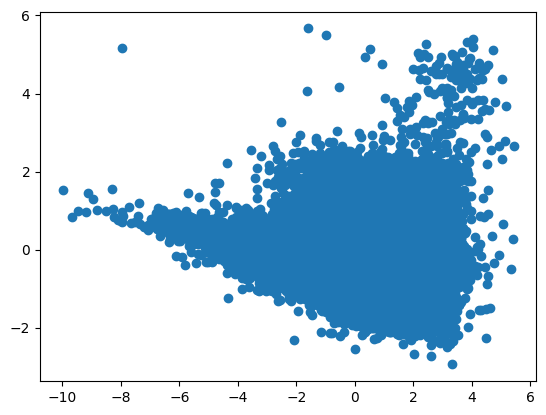

In [49]:
plt.scatter(x, y)


### A 3d interactive scatter plot
Note: The 3d scatter plot would not be INTERACTIVE on github. You'll have to run this notebook on your pc to see the interactive 3d scatter plot.

In [ ]:
# import plotly.express as px
# import pandas as pd

train_pca = train_trans_3

# Creating a DataFrame with the PCA-transformed data and labels
df = pd.DataFrame(data=train_pca, columns=['PC1', 'PC2', 'PC3'])
df['Label'] = train_labels
df['Label'] = df['Label'].replace({0: 'Quasar', 1: 'Galaxy', 2: 'Star'})

# Creating an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='Label', labels={'Label': 'Class'}, color_discrete_map={'Quasar': 'red', 'Galaxy': 'green', 'Star': 'blue'})
fig.update_traces(marker=dict(size=5))
fig.update_layout(scene=dict(zaxis=dict(range=[0, max(df['PC3'])])), title='Interactive 3D PCA Plot')
fig.show()


![3d scatter plot static](results_screenshots/3d-scatter-plot.png)


#### Observations:

- The three principal components (PCA axes) explain 97.8% of the variance in the original data. Since we have three almost distinct groups in the data, representing three classes, it's safe to assume that using photometric measurements should be effective for classifying these three classes. We'll explore the classification accuracy shortly.

- Most of the data points **(more than 80%) belong to three distinct groups**. This suggests that we should be able to achieve an accuracy of at least 80% using a classification algorithm. This 80% is our **baseline accuracy** for classification.



# Gaussian Mixture Model (GMM) - An Unsupervised Learning Approach
Note we have not used Kmeans clustering algorithm as it does not produces the probabilities corresponding to each cluster for each data-point.
It rather produces hard labels.
The probabilities will be helpful for us when we'll create an ensemble of different models. At that time this model will be able to provide us with a different point-of-view of the data


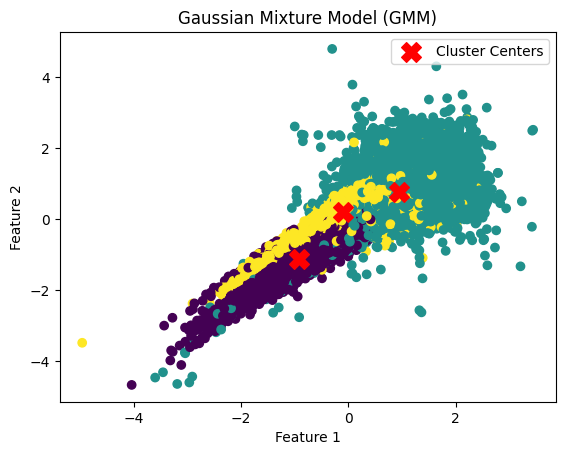

In [51]:
#from sklearn.mixture import GaussianMixture

X = train_np

gmm = GaussianMixture(n_components= 3)
gmm.fit(X)
new_points       =  train_np
labels_gmm_train =  gmm.predict(new_points)
cluster_centers  =  gmm.means_

# Visualize the data and clusters
plt.scatter(X[:, 0], X[:, 1], c=labels_gmm_train)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Mixture Model (GMM)')
plt.legend()
plt.show()


In [52]:
#import pickle

# Saving the model to a file
with open('gmm_model.pkl', 'wb') as file:
    pickle.dump(gmm, file)


### Reordering the predicted Labels

The following code:
- Generates permutations of the values [0, 1, 2]. For example, it can create permutations like [1, 0, 2] or [2, 0, 1].

- It replaces the values of [0, 1, 2] in the input array with the corresponding values from the current permutation.
    - E.g: if: $$permutation-1 = [0, 1, 2] -----> [0, 1, 1, 1, 2, 2, 2, 0, 0, 1, 0] $$
    - Then after replacements: $$permutation-2 = [1, 0, 2] -----> [1, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1] $$

- This process is essential because when an algorithm classifies data into clusters, we do not know if the new labels (e.g., 0, 1, 2) correspond to our original labels (e.g., 0, 1, 2).

- To identify the correct mapping between new and old labels, we replace the new labels (0, 1, 2) with all possible permutations of the original labels (0, 1, 2).

- One of these permutations will match our original labels, and we can identify it by comparing all permutations with the original labels. The permutation with the highest accuracy is considered the correct one.


In [53]:
# Calculating class probabilities for each sample in the training set using Gaussian Mixture Model (GMM)
gmm_train_probs = gmm.predict_proba(train_np)
gmm_valid_probs = gmm.predict_proba(valid_np)
gmm_test_probs  = gmm.predict_proba(test_np)

# Predicting class labels for each sample in the training set using GMM
gmm_train_preds = gmm.predict(train_np)
gmm_valid_preds = gmm.predict(valid_np)
gmm_test_preds  = gmm.predict(test_np)



In [54]:
# Scores on train Data
train_result_dict = hp.generate_permutation_dict(labels_gmm_train)

# Calculating and printing the predictions-score for each permutation using the custom built function "score_calculator_for_preds"
for key, value in train_result_dict.items():
    print(f'Correct predictions for {key}: {hp.score_calculator_for_preds(value, train_labels, train_np)}')


Correct predictions for Permutation_1: (0, 1, 2): 0.26081223628691985
Correct predictions for Permutation_2: (0, 2, 1): 0.10993905297702766
Correct predictions for Permutation_3: (1, 0, 2): 0.1629746835443038
Correct predictions for Permutation_4: (1, 2, 0): 0.500673933427098
Correct predictions for Permutation_5: (2, 0, 1): 0.2385138302859822
Correct predictions for Permutation_6: (2, 1, 0): 0.7270862634786686


In [55]:
# Scores on Validation Data
valid_result_dict = hp.generate_permutation_dict(gmm_valid_preds)

# Calculating and printing the predictions-score for each permutation using the custom built function "score_calculator_for_preds"
for key, value in valid_result_dict.items():
    print(f'Correct predictions for {key}: {hp.score_calculator_for_preds(value, valid_labels, valid_np)}')


Correct predictions for Permutation_1: (0, 1, 2): 0.26766877637130804
Correct predictions for Permutation_2: (0, 2, 1): 0.11269338959212377
Correct predictions for Permutation_3: (1, 0, 2): 0.16271097046413502
Correct predictions for Permutation_4: (1, 2, 0): 0.4974507735583685
Correct predictions for Permutation_5: (2, 0, 1): 0.2348804500703235
Correct predictions for Permutation_6: (2, 1, 0): 0.7245956399437412


In [56]:
# Scores on Test Data
test_result_dict = hp.generate_permutation_dict(gmm_test_preds)

# Calculating and printing the predictions-score for each permutation using the custom built function "score_calculator_for_preds"
for key, value in test_result_dict.items():
    print(f'Correct predictions for {key}: {hp.score_calculator_for_preds(value, test_labels, test_np)}')


Correct predictions for Permutation_1: (0, 1, 2): 0.2603040688988488
Correct predictions for Permutation_2: (0, 2, 1): 0.11354249055277266
Correct predictions for Permutation_3: (1, 0, 2): 0.1601195184111082
Correct predictions for Permutation_4: (1, 2, 0): 0.5029440196853854
Correct predictions for Permutation_5: (2, 0, 1): 0.23675191141576588
Correct predictions for Permutation_6: (2, 1, 0): 0.7263379910361192


In [58]:
# Reordring the PREDICTED-LABELS according to the correct permutation
# We MIGHT use them later in model ensembling
gmm_valid_preds = valid_result_dict['Permutation_6: (2, 1, 0)']
gmm_test_preds  = test_result_dict['Permutation_6: (2, 1, 0)']

# confirming if the labels are replaced properly
print(f' {hp.score_calculator_for_preds(gmm_valid_preds, valid_labels, valid_np)} ')
print(f' {hp.score_calculator_for_preds(gmm_test_preds,  test_labels,  test_np)}  ')


 0.7245956399437412 
 0.7263379910361192  


**Consistent high accuracy scores for the 6th permutation across all data splits(train, validation, test), shows clearly, without any doubt that this permutation is currently, the correct permutation for our data.**

Also notice since for all data splits the acuuracy scores are the same i.e. 72% - 73%. This implies that this model is well generalized, if we need an accuracy of just 72% to 73%.


### Reordering/Shuffling the predicted-probability-columns


In [59]:
# Reordring the PROBABILITIES according to the correct permutation - Note that the correct permutation CAN BE different for probabilities and lables
# We might use them later in model ensembling
input_indices = [2, 1, 0]
train_dict_probs = hp.shuffle_columns(input_indices, gmm_train_probs)

# Calculating and printing the predictions-score for each permutation using the custom built function "score_calculator"
for key, value in train_dict_probs.items():
    print(f'Correct predictions for {key}: {hp.score_calculator(value, train_labels, train_np)}')



Correct predictions for permutation(2, 1, 0): 0.7270862634786686
Correct predictions for permutation(2, 0, 1): 0.500673933427098
Correct predictions for permutation(1, 2, 0): 0.2385138302859822
Correct predictions for permutation(1, 0, 2): 0.1629746835443038
Correct predictions for permutation(0, 2, 1): 0.10993905297702766
Correct predictions for permutation(0, 1, 2): 0.26081223628691985


In [60]:
# Scores on validation data
valid_dict_probs = hp.shuffle_columns(input_indices, gmm_valid_probs)

# Calculating and printing the predictions-score for each permutation using the custom built function "score_calculator"
for key, value in valid_dict_probs.items():
    print(f'Correct predictions for {key}: {hp.score_calculator(value, valid_labels, valid_np)}')


Correct predictions for permutation(2, 1, 0): 0.7245956399437412
Correct predictions for permutation(2, 0, 1): 0.4974507735583685
Correct predictions for permutation(1, 2, 0): 0.2348804500703235
Correct predictions for permutation(1, 0, 2): 0.16271097046413502
Correct predictions for permutation(0, 2, 1): 0.11269338959212377
Correct predictions for permutation(0, 1, 2): 0.26766877637130804


In [61]:
# Scores on test data
test_dict_probs = hp.shuffle_columns(input_indices, gmm_test_probs)

# Calculating and printing the predictions-score for each permutation using the custom built function "score_calculator"
for key, value in test_dict_probs.items():
    print(f'Correct predictions for {key}: {hp.score_calculator(value, test_labels, test_np)}')
    
    

Correct predictions for permutation(2, 1, 0): 0.7263379910361192
Correct predictions for permutation(2, 0, 1): 0.5029440196853854
Correct predictions for permutation(1, 2, 0): 0.23675191141576588
Correct predictions for permutation(1, 0, 2): 0.1601195184111082
Correct predictions for permutation(0, 2, 1): 0.11354249055277266
Correct predictions for permutation(0, 1, 2): 0.2603040688988488


In [63]:
# Reordring the PROBABILITIES COLUMNS according to the correct permutation - Note that the correct permutation CAN BE different for
# predicted-probabilities and predicted-labels

# We might use them later in model ensembling
gmm_train_probs = train_dict_probs['permutation(2, 1, 0)']
gmm_valid_probs = valid_dict_probs['permutation(2, 1, 0)']
gmm_test_probs  =  test_dict_probs['permutation(2, 1, 0)']

# Confirming if the probability-columns were shuffled correctly
print( hp.score_calculator(gmm_valid_probs, valid_labels, valid_np) )
print( hp.score_calculator(gmm_test_probs,  test_labels,  test_np)  )


0.7245956399437412
0.7263379910361192


# Neural Network Model - Supervised Learning Approach

In [65]:
!mkdir my_log_dir


### Defining the Architecture & Compiling the Model


In [71]:
input_shape = (6,)

input_layer = Input(shape=input_shape)
x = Dense(32, activation='relu')(input_layer)
x = Dense(64, activation='relu')(x)
x = Dense(12, activation='relu')(x)
output_layer = Dense(3, activation='softmax')(x)
NN_model = Model(inputs=input_layer, outputs=output_layer)


optimizer = optimizers.Adam(learning_rate=0.01)
NN_model.compile(optimizer =  optimizer,
              loss      =  'sparse_categorical_crossentropy',
              metrics   =  ['accuracy'])

# Display a summary of the model architecture
NN_model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 12)             │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            39 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,155 (12.32 KB)

 Trainable params: 3,155 (12.32 KB)

 Non-trainable params: 0 (0.00 B)

### Setting Up callbacks

In [72]:
#from tensorflow.keras import callbacks

callbacks_list = [
                    callbacks.EarlyStopping(
                        monitor   = 'val_accuracy',    # Available metrics are: loss, accuracy, val_loss, val_accuracy
                        patience  = 5,                 # if the val_accuracy does not increase for 5 epochs, it'll automatically stop the training 
                        ),
    
                    callbacks.ModelCheckpoint(
                        filepath       =  'NN_model.keras',
                        monitor        =  'val_loss',
                        save_best_only =  True,        # only the set of weights with minimum val_loss will be saved
                    ),
                    callbacks.ReduceLROnPlateau(
                        monitor   =  'val_loss',
                        factor    =  0.8,
                        patience  =  5,
                    ),
                    callbacks.TensorBoard(
                        log_dir          = 'my_log_dir',
                        histogram_freq   =  1,
                    )
                 ]


### Training the Model


In [73]:
history = NN_model.fit(
    train_np, train_labels,
    epochs          = 30,
    batch_size      = 600,
    validation_data = (valid_np, valid_labels),
    callbacks       = callbacks_list
)


Epoch 1/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7797 - loss: 0.5617 - val_accuracy: 0.9232 - val_loss: 0.2113 - learning_rate: 0.0100
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9391 - loss: 0.1819 - val_accuracy: 0.9406 - val_loss: 0.1758 - learning_rate: 0.0100
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9443 - loss: 0.1627 - val_accuracy: 0.9527 - val_loss: 0.1412 - learning_rate: 0.0100
Epoch 4/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9557 - loss: 0.1371 - val_accuracy: 0.9581 - val_loss: 0.1354 - learning_rate: 0.0100
Epoch 5/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9545 - loss: 0.1407 - val_accuracy: 0.9506 - val_loss: 0.1465 - learning_rate: 0.0100
Epoch 6/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9575 - loss: 0.1315 - val_accuracy: 0.9604 - val_loss: 0.1308 - learning_rate: 0.0100
Epoch 7/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9639 - loss: 0.1191 - val_accuracy: 

In [74]:
!tensorboard --logdir=my_log_dir


2025-03-22 10:48:14.377224: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-22 10:48:14.381153: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-22 10:48:14.420547: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-22 10:48:15.752488: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --

[click here to see LIVE tensorboard](http://localhost:6006/)


### Plotting

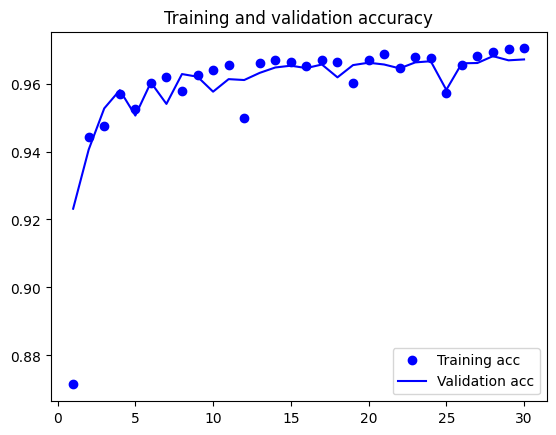

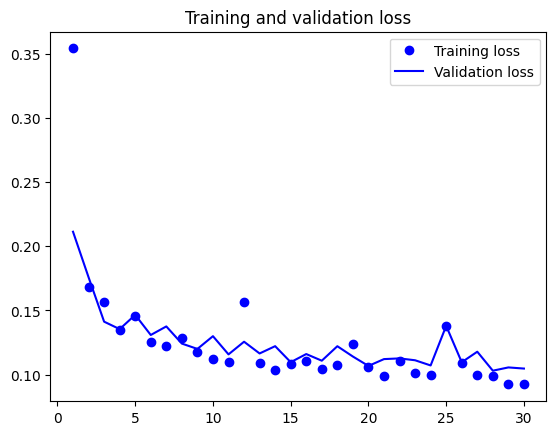

In [75]:
hp.plot_training_history(history)


Since the accuracy and loss curves on validation and test data are closely following each other, therefore we can safely assume that the model has generalized well i.e. it'll most probably give the same accuracy on the test data as well.

### Neural Network Classification Report and Confusion Matrix on Validation Data


356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3792
           1       0.95      0.95      0.95      3792
           2       0.98      1.00      0.99      3792

    accuracy                           0.97     11376
   macro avg       0.97      0.97      0.97     11376
weighted avg       0.97      0.97      0.97     11376



0.9671237693389592

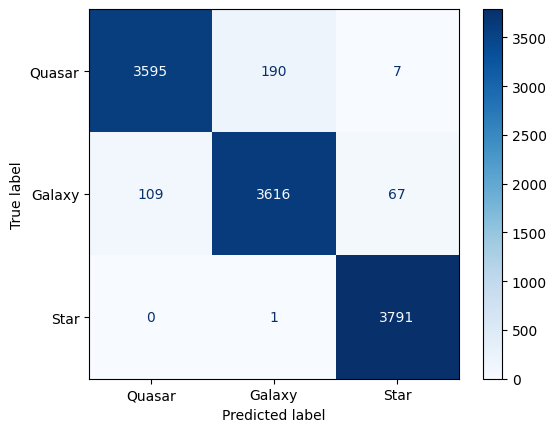

In [76]:
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicting class probabilities for the validation set using the neural network model
NN_valid_probs = NN_model.predict(valid_np)
# Converting predicted probabilities to class labels (argmax)
NN_valid_preds = np.argmax(NN_valid_probs, axis=1)

# Generating a classification report and display a confusion matrix for the validation predictions
hp.classification_report_and_confusion_matrix(valid_labels, NN_valid_preds)

# Calculating accuracy for the validation predictions using a custom function
hp.score_calculator_for_preds(NN_valid_preds, valid_labels, valid_np)



### Neural Network Classification Report and Confusion Matrix on Test Data


356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3793
           1       0.95      0.96      0.95      3793
           2       0.98      1.00      0.99      3793

    accuracy                           0.97     11379
   macro avg       0.97      0.97      0.97     11379
weighted avg       0.97      0.97      0.97     11379



0.969505228930486

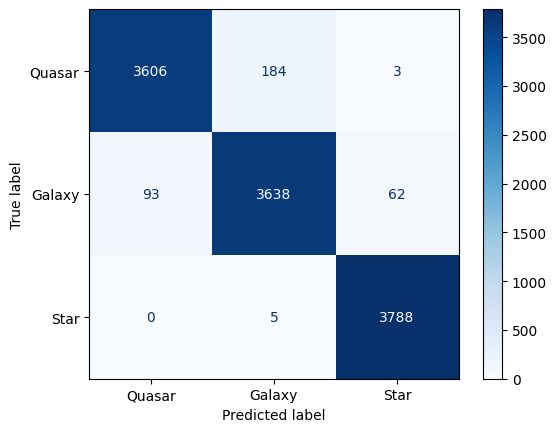

In [77]:
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicting class probabilities for the test set using the neural network model
NN_test_probs = NN_model.predict(test_np)
# Converting predicted probabilities to class labels (argmax)
NN_test_preds = np.argmax(NN_test_probs, axis=1)

# Generating a classification report and displaying a confusion matrix for the test predictions
hp.classification_report_and_confusion_matrix(test_labels, NN_test_preds)

# Calculating accuracy for the test predictions using a custom function
hp.score_calculator_for_preds(NN_test_preds, test_labels, test_np)


### **Observations**
**We see that the neural network is performing well on the test data as well. So, we were right when we said that most probably the model has generalized well.**

# XGBoost Model - Supervised Learning Approach

In [78]:
# from xgboost import XGBClassifier

# Creating an instance of the XGBoost Classifier
XGB_model = XGBClassifier()

# Training the XGBoost model on the training data
XGB_model.fit(train_np, train_labels)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [79]:
# #import pickle

# # Saving the model
# with open('XGB_model.pkl', 'wb') as file:
#     pickle.dump(XGB_model, file)


### XGBoost Classification Report and Confusion Matrix on Validation Data


              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3792
           1       0.95      0.96      0.95      3792
           2       1.00      1.00      1.00      3792

    accuracy                           0.97     11376
   macro avg       0.97      0.97      0.97     11376
weighted avg       0.97      0.97      0.97     11376



0.9687939521800282

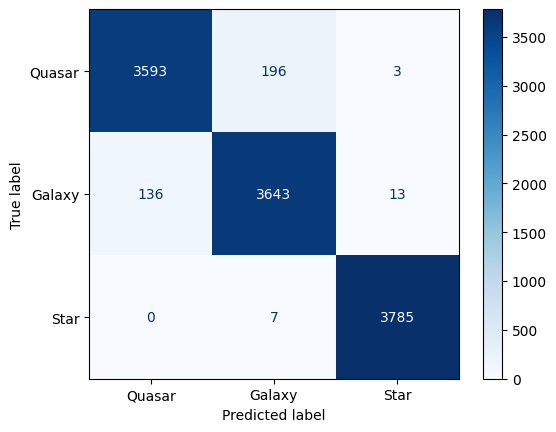

In [80]:
# Generating class probabilities for the validation set using the XGBoost model
XGB_valid_probs = XGB_model.predict_proba(valid_np)
# Predicting class labels for the validation set using the XGBoost model
XGB_valid_preds = XGB_model.predict(valid_np)

# Generating a classification report and displaying a confusion matrix for the validation predictions
hp.classification_report_and_confusion_matrix(valid_labels, XGB_valid_preds)

# Calculating accuracy for the validation predictions using a custom function
hp.score_calculator_for_preds(XGB_valid_preds, valid_labels, valid_np)


###  XGBoost Classification Report and Confusion Matrix on Test Data


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3793
           1       0.95      0.97      0.96      3793
           2       1.00      1.00      1.00      3793

    accuracy                           0.97     11379
   macro avg       0.97      0.97      0.97     11379
weighted avg       0.97      0.97      0.97     11379



0.9724053080235522

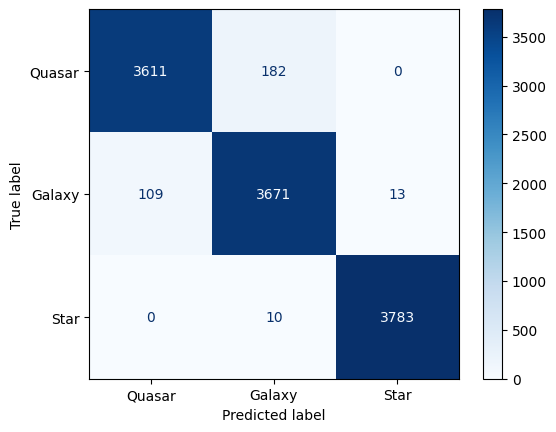

In [81]:
# Generating class probabilities for the test set using the XGBoost model
XGB_test_probs = XGB_model.predict_proba(test_np)
# Generating class predictions for the test set using the XGBoost model
XGB_test_preds = XGB_model.predict(test_np)

# Generating a classification report and displaying a confusion matrix for the test predictions
hp.classification_report_and_confusion_matrix(test_labels, XGB_test_preds)

# Calculating accuracy for the test predictions using a custom function
hp.score_calculator_for_preds(XGB_test_preds, test_labels, test_np)


### **Observations**
**We see that the XGBoost is performing better (as compared to neural network) on both, the validation data as well as the test data.**

# Random Forest - Supervised Learning Approach

In [82]:
#from sklearn.ensemble import RandomForestClassifier

# Creating an instance of the Random Forest Classifier
RF_model = RandomForestClassifier()

# Training the Random Forest model on the training data
RF_model.fit(train_np, train_labels)


RandomForestClassifier()

In [83]:
#import pickle

# Saving the model
with open('RF_model.pkl', 'wb') as file:
    pickle.dump(RF_model, file)


### Random Forest Classification Report and Confusion Matrix on Validation Data


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3792
           1       0.95      0.96      0.96      3792
           2       1.00      1.00      1.00      3792

    accuracy                           0.97     11376
   macro avg       0.97      0.97      0.97     11376
weighted avg       0.97      0.97      0.97     11376



0.9708157524613221

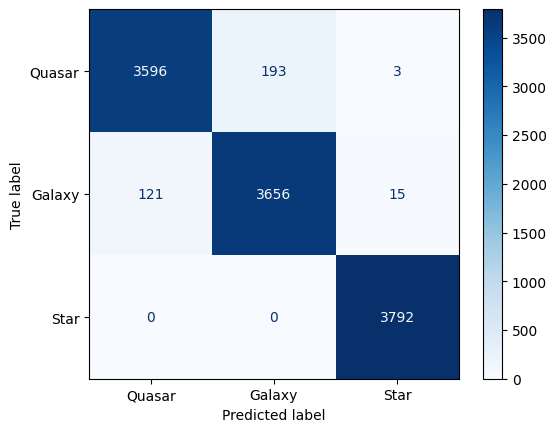

In [84]:
# Generating class probabilities for the validation set using the Random Forest model
RF_valid_probs = RF_model.predict_proba(valid_np)
# Predicting class labels for the validation set using the Random Forest model
RF_valid_preds = RF_model.predict(valid_np)

# Generating a classification report and display a confusion matrix for the validation predictions
hp.classification_report_and_confusion_matrix(valid_labels, RF_valid_preds)

# Calculating accuracy for the validation predictions using a custom function
hp.score_calculator_for_preds(RF_valid_preds, valid_labels, valid_np)


###  Random Forest Classification Report and Confusion Matrix on Test Data


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3793
           1       0.95      0.97      0.96      3793
           2       1.00      1.00      1.00      3793

    accuracy                           0.97     11379
   macro avg       0.97      0.97      0.97     11379
weighted avg       0.97      0.97      0.97     11379



0.973811406977766

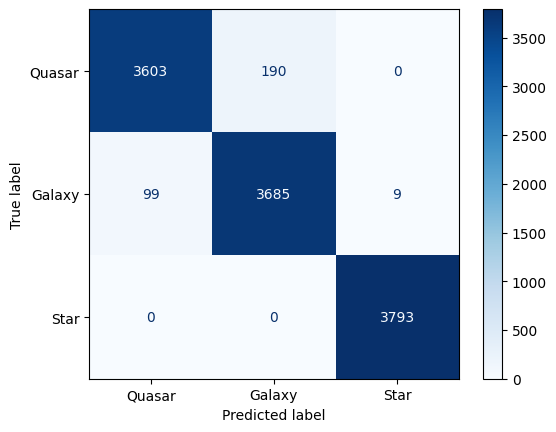

In [85]:
# Generating class probabilities for the test set using the Random Forest model
RF_test_probs = RF_model.predict_proba(test_np)
# Predicting class labels for the test set using the Random Forest model
RF_test_preds = RF_model.predict(test_np)

# Generating a classification report and display a confusion matrix for the test predictions
hp.classification_report_and_confusion_matrix(test_labels, RF_test_preds)

# Calculating accuracy for the test predictions using a custom function
hp.score_calculator_for_preds(RF_test_preds, test_labels, test_np)


### **Observations**
**So far, Random forest has produced the best results on both, the validation data as well as the test data.**


# Model Ensembling

Ensembling relies on the assumption that different good models trained independently are likely to be good for different reasons: each model looks at slightly different aspects of the data to make its predictions, getting part of the “truth” but not all of
it. You may be familiar with the ancient parable of the blind men and the elephant: a
group of blind men come across an elephant for the first time and try to understand
what the elephant is by touching it. Each man touches a different part of the elephant’s body—just one part, such as the trunk or a leg. Then the men describe to
each other what an elephant is: “It’s like a snake,” “Like a pillar or a tree,” and so on.
The blind men are essentially machine-learning models trying to understand the manifold of the training data, each from its own perspective, using its own assumptions
(provided by the unique architecture of the model and the unique random weight initialization). Each of them gets part of the truth of the data, but not the whole truth. By
pooling their perspectives together, you can get a far more accurate description of the
data. The elephant is a combination of parts: not any single blind man gets it quite
right, but, interviewed together, they can tell a fairly accurate story.

- Deep Learning with Python - **FRANÇOIS CHOLLET**


### Setting up new baseline accuracies using validation and test splits

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3792
           1       0.95      0.97      0.96      3792
           2       0.99      1.00      1.00      3792

    accuracy                           0.97     11376
   macro avg       0.97      0.97      0.97     11376
weighted avg       0.97      0.97      0.97     11376



0.9703762306610408

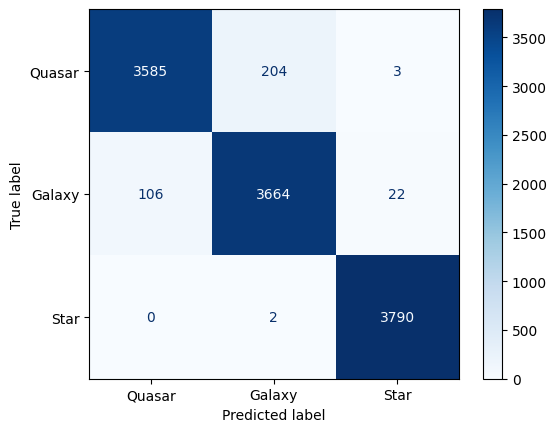

In [86]:
# New Baseline accuracy for validation data
# Setting weights for each model's predictions
gmm_weight = 1; NN_weight  = 1; XGB_weight = 1; RF_weight  = 1

# Calculating final probabilities by combining predictions from multiple models with weights
final_probs = (gmm_weight * gmm_valid_probs + NN_weight * NN_valid_probs +
               XGB_weight * XGB_valid_probs + RF_weight * RF_valid_probs) / 4
# Converting probabilities into predictions
final_predicted_labels = np.argmax(final_probs, axis=1)

# Generating a classification report and displaying a confusion matrix for the final predictions on the validation data
hp.classification_report_and_confusion_matrix(valid_labels, final_predicted_labels)

# Calculating accuracy for the final predictions on the validation data using a custom function
hp.score_calculator_for_preds(final_predicted_labels, valid_labels, valid_np)


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3793
           1       0.95      0.97      0.96      3793
           2       0.99      1.00      1.00      3793

    accuracy                           0.97     11379
   macro avg       0.97      0.97      0.97     11379
weighted avg       0.97      0.97      0.97     11379



0.972134317862166

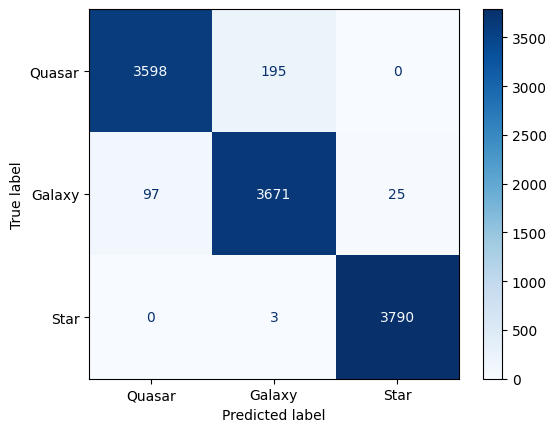

In [87]:
# New Baseline accuracy for test data
# Setting weights for each model's predictions
gmm_weight = 1; NN_weight  = 1; XGB_weight = 1; RF_weight  = 1

# Calculating final probabilities by combining predictions from multiple models with weights
final_probs = (gmm_weight * gmm_test_probs + NN_weight * NN_test_probs +
               XGB_weight * XGB_test_probs + RF_weight * RF_test_probs) / 4
# Converting probabilities into predictions
final_predicted_labels = np.argmax(final_probs, axis=1)

# Generating a classification report and displaying a confusion matrix for the final predictions on the test data
hp.classification_report_and_confusion_matrix(test_labels, final_predicted_labels)

# Calculating accuracy for the final predictions on the test data using a custom function
hp.score_calculator_for_preds(final_predicted_labels, test_labels, valid_np)


###  Model Ensembling Classification Report and Confusion Matrix for Validation Data


In [88]:
# Collecting model predictions for validation data
model_predictions = [gmm_valid_probs, NN_valid_probs, XGB_valid_probs, RF_valid_probs]

# Performing random search to optimize weights for ensemble models
best_weights, best_accuracy = hp.optimize_weights_with_random_search(valid_labels, model_predictions, 10000)

# Printing the best weights and corresponding best accuracy
print("Best Weights:",  best_weights)
print("Best Accuracy:", best_accuracy)

file_path = 'best_weights.csv'
# Saving the NumPy array as a CSV file
#np.savetxt(file_path, best_weights, delimiter=',')


Best Weights: [0.04232501 0.19778434 0.29560327 0.46428739]
Best Accuracy: 0.9719585091420534


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3792
           1       0.95      0.97      0.96      3792
           2       1.00      1.00      1.00      3792

    accuracy                           0.97     11376
   macro avg       0.97      0.97      0.97     11376
weighted avg       0.97      0.97      0.97     11376



0.9719585091420534

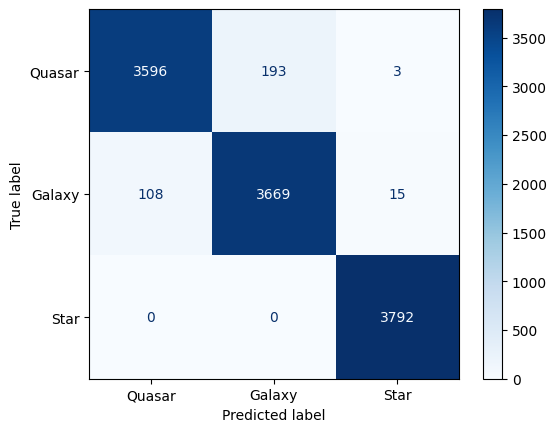

In [89]:
# Assigning the best weights obtained from random search
gmm_weight = best_weights[0]; NN_weight = best_weights[1]; XGB_weight = best_weights[2]; RF_weight = best_weights[3]

# Calculating final probabilities using the best weights for each model
final_probs = (gmm_weight * gmm_valid_probs + NN_weight * NN_valid_probs +
               XGB_weight * XGB_valid_probs + RF_weight * RF_valid_probs) / 4
# Converting probabilities into predictions
final_predicted_labels = np.argmax(final_probs, axis=1)

# Generating a classification report and displaying a confusion matrix for the final predictions on the validation data
hp.classification_report_and_confusion_matrix(valid_labels, final_predicted_labels)

# Calculating accuracy for the final predictions on the validation data using a custom function
hp.score_calculator_for_preds(final_predicted_labels, valid_labels, valid_np)


###  Model Ensembling Classification Report and Confusion Matrix for Test Data


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3793
           1       0.95      0.97      0.96      3793
           2       1.00      1.00      1.00      3793

    accuracy                           0.97     11379
   macro avg       0.97      0.97      0.97     11379
weighted avg       0.97      0.97      0.97     11379



0.9734598822392125

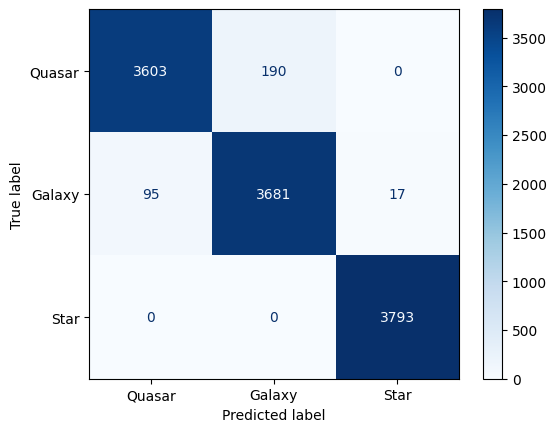

In [90]:
# Assigning the best weights obtained from random search
gmm_weight = best_weights[0]; NN_weight = best_weights[1]; XGB_weight = best_weights[2]; RF_weight = best_weights[3]

# Calculating final probabilities using the best weights for each model on the test data
final_probs = (gmm_weight * gmm_test_probs + NN_weight * NN_test_probs +
               XGB_weight * XGB_test_probs + RF_weight * RF_test_probs) / 4
# Converting probabilities into predictions
final_predicted_labels = np.argmax(final_probs, axis=1)

# Generating a classification report and displaying a confusion matrix for the final predictions on the test data
hp.classification_report_and_confusion_matrix(test_labels, final_predicted_labels)

# Calculating accuracy for the final predictions on the test data using a custom function
hp.score_calculator_for_preds(final_predicted_labels, test_labels, test_np)


# Conclusion and Future Work?

- First, we cleaned the data to remove problematic samples. Next, we normalized the data to accelerate convergence of the machine learning models and to ensure equal importance among all features for solving the problem.
- Following normalization, we visualized the data in three dimensions and observed distinct clusters for the three classes: quasars, stars, and galaxies.
- Subsequently, we trained various machine learning models to identify the best performer for our scenario, with Random Forest proving most effective having an accuracy close to 97.5 \%.
- Although we attempted model ensembling, it did not yield improved results compared to the Random Forest alone. We also generated confusion matrices for the Random Forest predictions, highlighting potential benefits from adjusting thresholds to enhance performance.


The key finding is that quasars, stars, and galaxies can indeed be classified using photometric data, achieving an impressive accuracy of over 97\% with our initial analysis. Further enhancements in machine learning models and additional data preprocessing could potentially boost accuracy significantly. By analyzing misclassified samples and identifying common issues, we may refine our preprocessing steps to address these challenges and improve model performance.

# Some other suggestions

Before I delve into how I plan to further improve accuracy, let's start with a simple concept. Imagine you're a student taking an exam. To keep things simple, let's say there are 100 true/false questions, with answers being either A or B. Now, suppose we've trained three models to tackle this exam. Two out of the three models have a commendable 97% accuracy, while the third model lags far behind, boasting only 5% or perhaps 10% accuracy. Initially, it might seem reasonable to dismiss this third model as ineffective and discard it swiftly. However, here's the intriguing part: since this model consistently produces incorrect answers, we can actually use it to generate incorrect answers deliberately. Given our high confidence in identifying wrong answers, we can leverage this information to further enhance the accuracy of our ensemble of models.

### How Can We Achieve This?

To accomplish this, there are a few key steps we can take:

1. **Leveraging Unsupervised Learning:** We need a model based on an unsupervised learning algorithm, similar to the one we employed in this notebook. This model is well-suited for the task at hand because, as we've empirically observed, it consistently generates very wrong outputs. For instance, a specific permutation consistently yielded an accuracy of merely 11% or even lower across all data splits.

2. **Adapting Our Optimization Function:** We can enhance our random search optimization function by assigning a negative weight to the weak model within our ensemble. Consequently, the predicted probabilities from the weak model will become negative. Instead of adding these negative probabilities to the predictions of the strong models, we'll subtract them. This subtraction will effectively suppress the impact of incorrect answers and, as a result, enhance our accuracy scores.

3. **Simple Probability Adjustment:** Alternatively, we can achieve the same effect by merely multiplying the predicted probabilities by -1. This eliminates the need to modify our existing random search optimization algorithm while achieving the desired outcome more straightforwardly.

### Possible Limitations

It's essential to be aware of potential limitations when implementing this new approach:

- **Generalization of the Weak Model:** The weak model must genuinely exhibit poor performance, consistently yielding low accuracy even when confronted with new, unseen data.

- **Effectiveness with Fewer Classes:** This approach tends to be more effective when dealing with a smaller number of classes. With fewer classes, there's a higher likelihood that the negative probabilities will accurately offset the corresponding positive probabilities, resulting in more significant accuracy improvements.